# Customer Churn classification 
To predict whether a customer would churn i.e. change the telco provider

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# reading the data file
churn= pd.read_csv("https://raw.githubusercontent.com/Kanikaitbhu/Data-Files/main/churn.csv")

In [3]:
# top rows of the data
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Data fields
state, string. 2-letter code of the US state of customer residence
account_length, numerical. Number of months the customer has been with the current telco provider
area_code, string="area_code_AAA" where AAA = 3 digit area code.
international_plan, (yes/no). The customer has international plan.
voice_mail_plan, (yes/no). The customer has voice mail plan.
number_vmail_messages, numerical. Number of voice-mail messages.
total_day_minutes, numerical. Total minutes of day calls.
total_day_calls, numerical. Total number of day calls.
total_day_charge, numerical. Total charge of day calls.
total_eve_minutes, numerical. Total minutes of evening calls.
total_eve_calls, numerical. Total number of evening calls.
total_eve_charge, numerical. Total charge of evening calls.
total_night_minutes, numerical. Total minutes of night calls.
total_night_calls, numerical. Total number of night calls.
total_night_charge, numerical. Total charge of night calls.
total_intl_minutes, numerical. Total minutes of international calls.
total_intl_calls, numerical. Total number of international calls.
total_intl_charge, numerical. Total charge of international calls
number_customer_service_calls, numerical. Number of calls to customer service
churn, (yes/no). Customer churn - target variable.

In [4]:
# data description of the numeric columns
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
Account Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area Code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
VMail Message,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Day Mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Day Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Day Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Eve Mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Eve Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Eve Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Night Mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [5]:
# Checking for Null and data type of the fields
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [6]:
# getting the numeric column names as list
Churn_numeric = list(churn.drop(["Area Code"],axis=1).select_dtypes(include='number'))

In [7]:
Churn_numeric

['Account Length',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls']

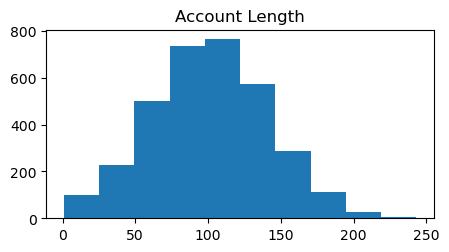

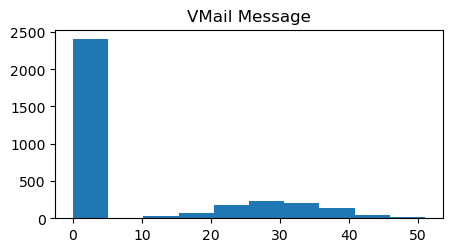

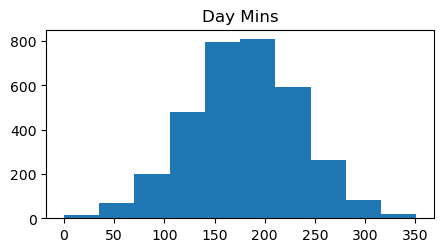

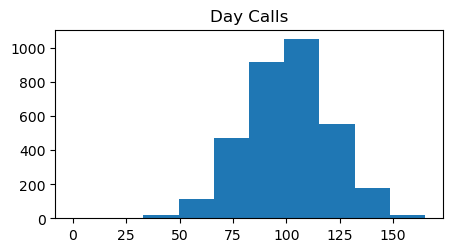

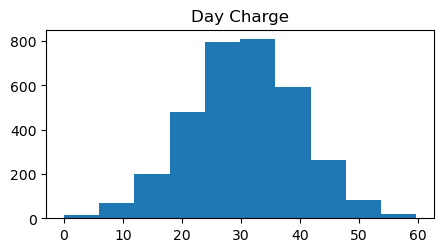

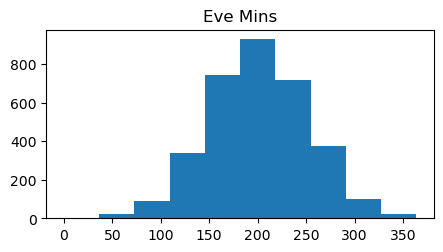

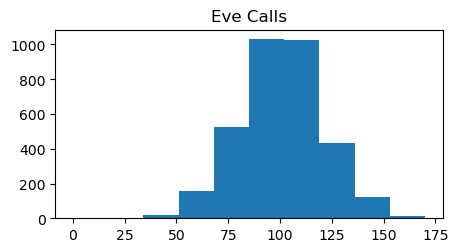

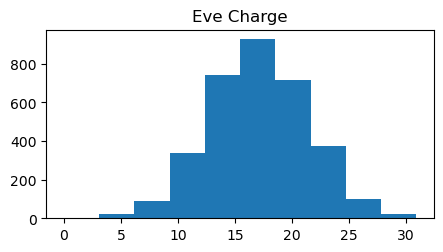

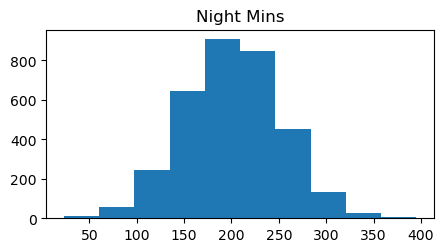

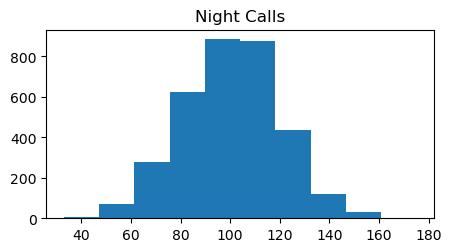

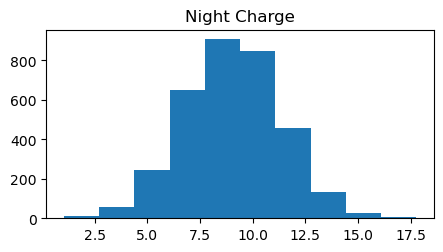

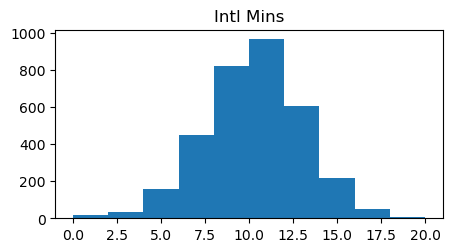

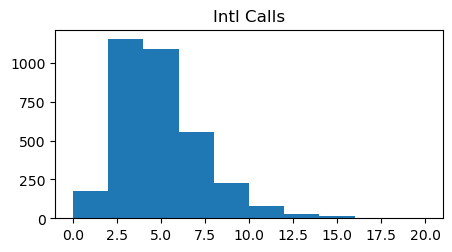

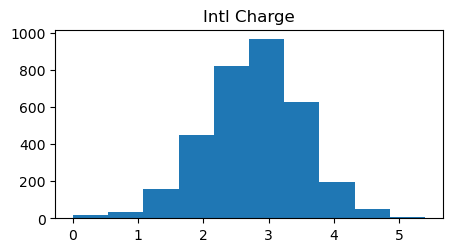

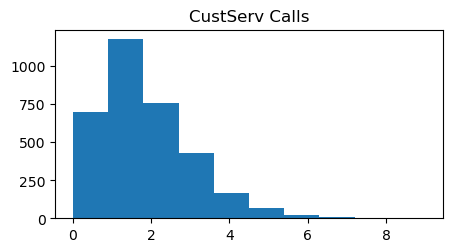

In [8]:
## plotting the distribution of numeric variables
for each in Churn_numeric:
    fig, axes = plt.subplots(1, 1, figsize=(5,2.5), dpi=100, sharex=True, sharey=True)
    plt.hist(churn[each])
    plt.title(each)


Distribution of intl calls and CustServ Calls are skewed.

In [9]:
# getting the numeric column names as list
Churn_object = list(churn.drop(["Phone","State"],axis=1).select_dtypes(include='object'))

In [10]:
Churn_object

["Int'l Plan", 'VMail Plan', 'Churn']

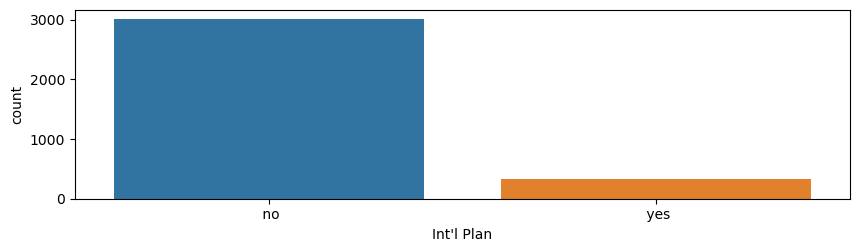

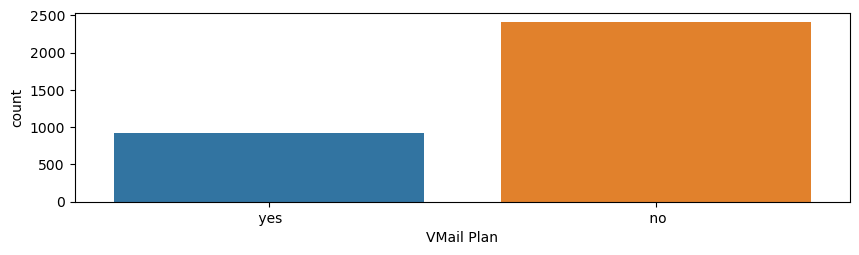

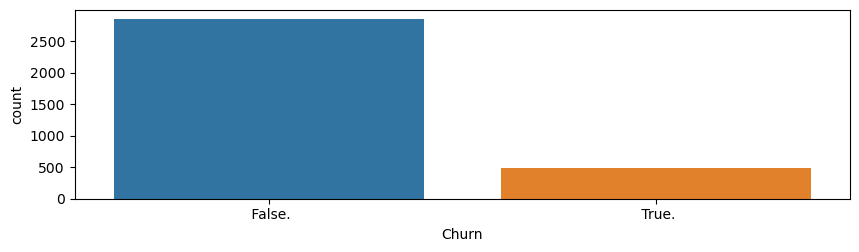

In [11]:
## plotting the distribution of numeric variables
for each in Churn_object:
    fig, axes = plt.subplots(1, 1, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
    sns.countplot(churn[each])
    #plt.title(each)


Number of customers who churned out is very low compared to who didn't
This shows that the data is skewed.

False/No will be coded as 0 and yes/True will be coded as 1

In [12]:
churn["Churn"]=np.where(churn["Churn"]==" False.", 0, 1)

In [13]:
churn["VMail Plan"]=np.where(churn["VMail Plan"]=="no", 0,1)

In [14]:
churn["Int'l Plan"]=np.where(churn["Int'l Plan"]=="no", 0,1)

In [15]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   int32  
 5   VMail Plan      3333 non-null   int32  
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

Now State, Phone are Object data type variables.

## Scaling the Variables

In [16]:
#scaling the variables using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
churn[Churn_numeric] = m.fit_transform(churn[Churn_numeric])

## Train Test Split

In [17]:
#Dropping the Phone, Churn, and State from Independent variables
X = churn.drop(["Churn","State","Phone"],axis=1)

In [18]:
y = churn["Churn"]

In [19]:
## Splitting into test and Train split using stratified as the data is imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=100, stratify = y)

In [20]:
len(y_test)

1000

# Model Building

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 515 to 1502
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  2333 non-null   float64
 1   Area Code       2333 non-null   int64  
 2   Int'l Plan      2333 non-null   int32  
 3   VMail Plan      2333 non-null   int32  
 4   VMail Message   2333 non-null   float64
 5   Day Mins        2333 non-null   float64
 6   Day Calls       2333 non-null   float64
 7   Day Charge      2333 non-null   float64
 8   Eve Mins        2333 non-null   float64
 9   Eve Calls       2333 non-null   float64
 10  Eve Charge      2333 non-null   float64
 11  Night Mins      2333 non-null   float64
 12  Night Calls     2333 non-null   float64
 13  Night Charge    2333 non-null   float64
 14  Intl Mins       2333 non-null   float64
 15  Intl Calls      2333 non-null   float64
 16  Intl Charge     2333 non-null   float64
 17  CustServ Calls  2333 non-null  

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

def draw_confmatrix(y_test, yhat, str1, str2):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1] )
    print("Confusion Matrix Is:", cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2] , yticklabels = [str1, str2] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def fit_test_model(model, X_train, y_train, X_test):
    # Train the model
    model.fit(X_train, y_train)
    # Y Hat Prediction on Test Data
    model_pred = model.predict(X_test)
    return model_pred
    
def prec_recall_curve(model,X_train, y_train, X_test, STR):   
    # predict probabilities
    probs = model.predict_proba(X_test)[:,1]
    # predict class values
    yhat = fit_test_model(model,X_train, y_train, X_test)
    #calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    # calculate F1 score
    f1 = f1_score(y_test, yhat)
   #calculate precision-recall AUC
    aucscore = auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(y_test, probs)
    print('f1=%.3f auc=%.3f ap=%.3f' % (f1, aucscore, ap))
    # plot no skill
    plt.figure(figsize=(10,10))
    plt.title(STR)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    # show the plot
    plt.show()

## Logistic Regression

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100, penalty= 'l2', solver='lbfgs', class_weight = "balanced")
model = lr.fit(X_train,y_train)
yhat = model.predict(X_test)

Accuracy Score Is :  0.714
LogisticRegression F1 score = 0.42338709677419356
LogisticRegression classification Score = 
               precision    recall  f1-score   support

           0       0.94      0.71      0.81       855
           1       0.30      0.72      0.42       145

    accuracy                           0.71      1000
   macro avg       0.62      0.72      0.62      1000
weighted avg       0.85      0.71      0.75      1000

Confusion Matrix Is: [[609 246]
 [ 40 105]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


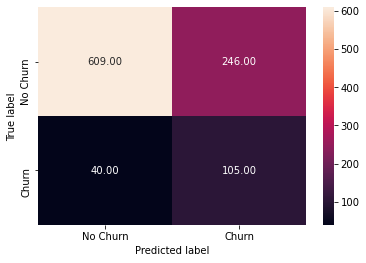

In [24]:
print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
draw_confmatrix(y_test, yhat,"No Churn","Churn")

In [25]:
# using Grid Search to get the paramameters giving highest accuracy
param_dist = {"penalty": ["l1", "l2", "elasticnet", "none"],
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

lr_CV= GridSearchCV(lr, param_dist)
lr_CV.fit(X_train,y_train)
lr_CV.best_params_

C:\Users\kanik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kanik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kanik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kanik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\kanik\anaconda3\lib\site-packages\sklearn\model_selectio

{'penalty': 'none', 'solver': 'newton-cg'}

## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(criterion= "entropy", max_depth= 3)
model_DT = DT.fit(X_train, y_train)
yhat = model_DT.predict(X_test)

Accuracy Score Is :  0.909
LogisticRegression F1 score = 0.5919282511210763
LogisticRegression classification Score = 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       855
           1       0.85      0.46      0.59       145

    accuracy                           0.91      1000
   macro avg       0.88      0.72      0.77      1000
weighted avg       0.90      0.91      0.90      1000

Confusion Matrix Is: [[843  12]
 [ 79  66]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


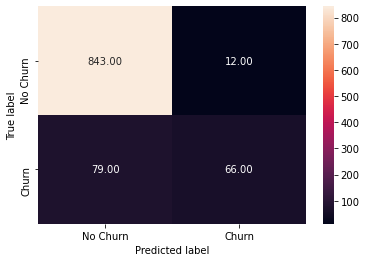

In [27]:
print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
draw_confmatrix(y_test, yhat, "No Churn","Churn")

In [28]:
from scipy.stats import randint
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "criterion": ["gini", "entropy"]}
# using Grid Search to get the paramameters giving highest accuracy
DT_CV = GridSearchCV(DT,param_dist, cv=5)
DT_CV.fit(X_train, y_train)
DT_CV.best_params_

{'criterion': 'entropy', 'max_depth': 3}

## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier(algorithm = 'auto', n_neighbors=7, p= 1)
model_KN = KN.fit(X_train, y_train)
yhat = model_KN.predict(X_test)

Accuracy Score Is :  0.871
LogisticRegression F1 score = 0.2366863905325444
LogisticRegression classification Score = 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       855
           1       0.83      0.14      0.24       145

    accuracy                           0.87      1000
   macro avg       0.85      0.57      0.58      1000
weighted avg       0.87      0.87      0.83      1000

Confusion Matrix Is: [[851   4]
 [125  20]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


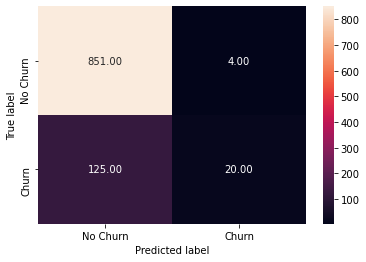

In [30]:
print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
draw_confmatrix(y_test, yhat, "No Churn","Churn")

Accuracy Score Is :  0.871
LogisticRegression F1 score = 0.2366863905325444
LogisticRegression classification Score = 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       855
           1       0.83      0.14      0.24       145

    accuracy                           0.87      1000
   macro avg       0.85      0.57      0.58      1000
weighted avg       0.87      0.87      0.83      1000

Confusion Matrix Is: [[851   4]
 [125  20]]


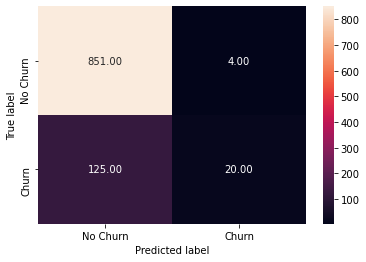

In [31]:
print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
draw_confmatrix(y_test, yhat, "No Churn","Churn")

In [32]:
params = {'n_neighbors': [3, 5, 7, 9, 11],
             "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
              "p":[1,2,3]}
KN_CV = GridSearchCV(KN,params)   
KN_CV.fit(X_train, y_train)
KN_CV.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}

# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
GN = GaussianNB()
model_GN = GN.fit(X_train,y_train)
yhat= model_GN.predict(X_test)

Accuracy Score Is :  0.887
LogisticRegression F1 score = 0.5311203319502076
LogisticRegression classification Score = 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       855
           1       0.67      0.44      0.53       145

    accuracy                           0.89      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.88      0.89      0.88      1000

Confusion Matrix Is: [[823  32]
 [ 81  64]]


C:\Users\kanik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


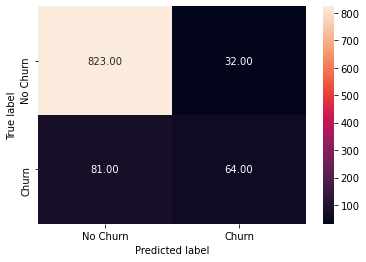

In [34]:
print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
print(lr.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
print(lr.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
draw_confmatrix(y_test, yhat, "No Churn","Churn")

f1=0.423 auc=0.377 ap=0.382


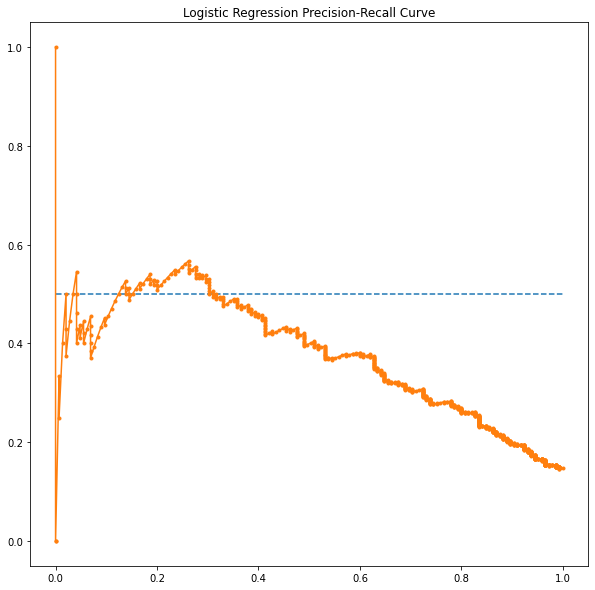

None
f1=0.237 auc=0.599 ap=0.536


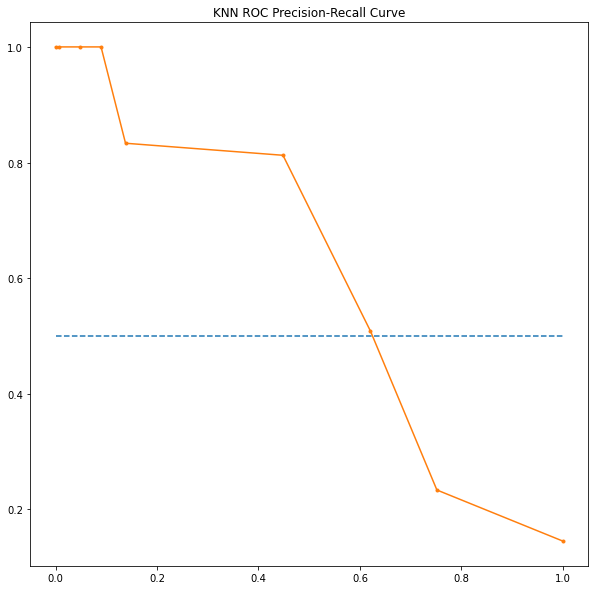

None
f1=0.531 auc=0.495 ap=0.501


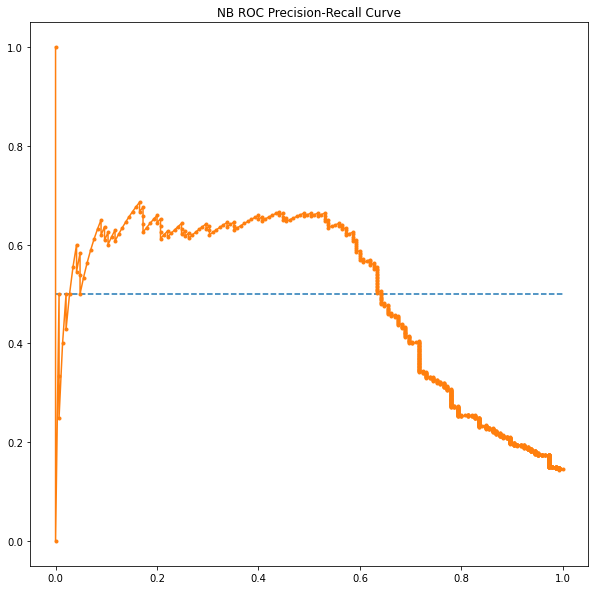

None
f1=0.592 auc=0.642 ap=0.567


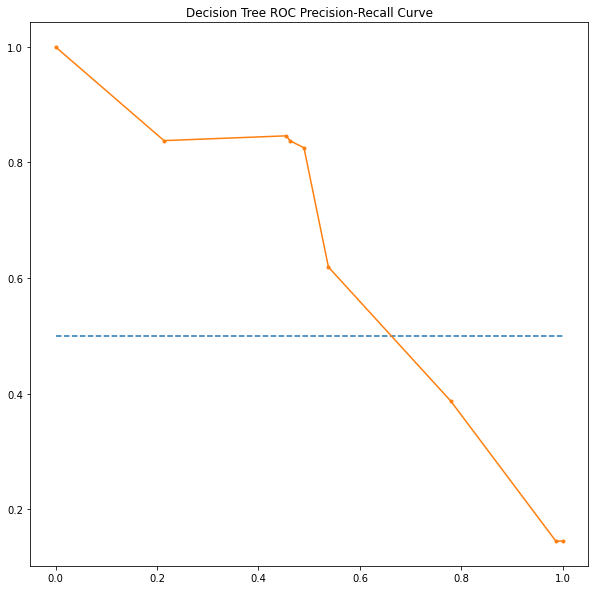

None


In [35]:
print(prec_recall_curve(lr, X_train, y_train, X_test, "Logistic Regression Precision-Recall Curve"))
print(prec_recall_curve(KN, X_train, y_train, X_test,"KNN ROC Precision-Recall Curve"))
print(prec_recall_curve(GN, X_train, y_train, X_test,"NB ROC Precision-Recall Curve"))
print(prec_recall_curve(DT, X_train, y_train,X_test,"Decision Tree ROC Precision-Recall Curve"))

Decision tree gave the highest accuracy

# Stratified KFOLD Cross Validation

In [36]:
Kfold = StratifiedKFold(n_splits =10)
cross_val_score(DT, X_train, y_train, cv= Kfold, n_jobs=1, scoring = 'accuracy')

array([0.8974359 , 0.88888889, 0.91452991, 0.9055794 , 0.9055794 ,
       0.90128755, 0.88412017, 0.89699571, 0.9055794 , 0.89699571])

Applying Stratified Kfold Cross validation on the best model we can see that the minimum accuracy we can get is 88.4%